# XSS Attack Detection - Model Training

# 📚 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

2025-04-28 16:30:22.383305: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-28 16:30:22.394071: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-28 16:30:22.425094: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745854222.476309  108731 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745854222.492408  108731 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745854222.528360  108731 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

# 1️⃣ Load the Dataset

In [3]:
df = pd.read_csv('XSS_dataset.csv')

print(f"Dataset Shape: {df.shape}")
print(df.head())

Dataset Shape: (13686, 3)
   Unnamed: 0                                           Sentence  Label
0           0  <li><a href="/wiki/File:Socrates.png" class="i...      0
1           1               <tt onmouseover="alert(1)">test</tt>      1
2           2  \t </span> <span class="reference-text">Steeri...      0
3           3  \t </span> <span class="reference-text"><cite ...      0
4           4  \t </span>. <a href="/wiki/Digital_object_iden...      0


# 2️⃣ Data Preprocessing

In [4]:
# Extract sentences and labels
sentences = df['Sentence'].astype(str).values
labels = df['Label'].values

# Tokenize the sentences
vocab_size = 10000  # Maximum number of words
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)

# Convert sentences to sequences of integers
sequences = tokenizer.texts_to_sequences(sentences)

# Pad sequences to the same length
max_length = 200
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}")

Training set: (10948, 200), Validation set: (2738, 200)


# 3️⃣ Build the Deep Learning Model

In [5]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.summary()

/home/yassine/DeepXSS/XSS/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-04-28 16:33:14.616949: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# 4️⃣ Compile the Model

In [6]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

# 5️⃣ Train the Model

In [8]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 123s 360ms/step - accuracy: 0.9974 - loss: 0.0130 - val_accuracy: 0.9971 - val_loss: 0.0135
Epoch 2/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 112s 327ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 0.9978 - val_loss: 0.0093
Epoch 3/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 168s 401ms/step - accuracy: 1.0000 - loss: 4.8655e-04 - val_accuracy: 0.9978 - val_loss: 0.0171
Epoch 4/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 82s 238ms/step - accuracy: 1.0000 - loss: 8.5431e-05 - val_accuracy: 0.9978 - val_loss: 0.0187
Epoch 5/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 114s 331ms/step - accuracy: 1.0000 - loss: 5.4176e-05 - val_accuracy: 0.9978 - val_loss: 0.0200
Epoch 6/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 90s 262ms/step - accuracy: 1.0000 - loss: 2.9644e-05 - val_accuracy: 0.9978 - val_loss: 0.0214
Epoch 7/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 111s 324ms/step - accuracy: 1.0000 - loss: 1.8437e-05 - val_accuracy: 0.9978 - val_loss: 0.0224
Epoch 8/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 115s 245ms/step - 

# 6️⃣ Evaluate the Model

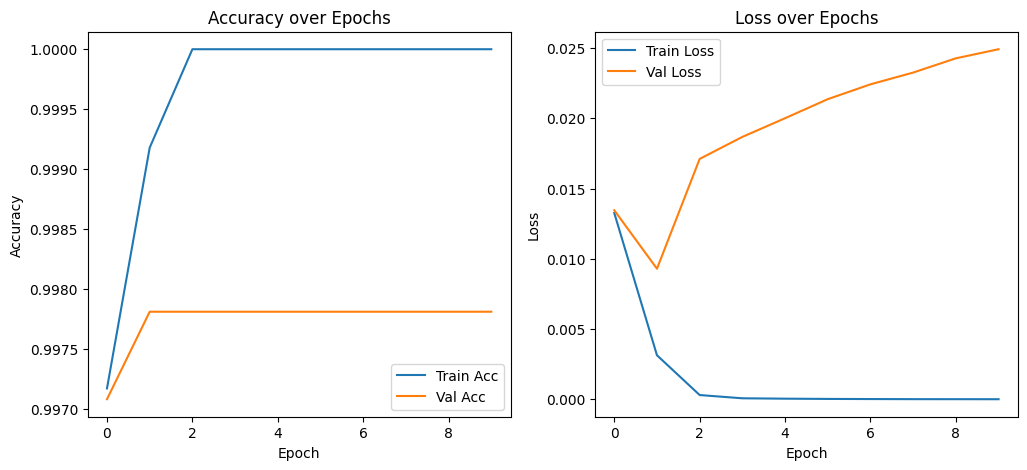

In [9]:
# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 7️⃣ Save the Model and Tokenizer

In [10]:
# Save model
model.save('xss_detector_model.h5')

# Save tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("✅ Model and Tokenizer saved successfully!")

✅ Model and Tokenizer saved successfully!
